
<center><img src="https://i.ibb.co/8PYwxbB/autoencoder.png"></center>

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

## Stage 2:  Import project dependencies

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

tf.__version__

'2.0.0-alpha0'

## Stage 3: Dataset preprocessing

### Import the dataset

In [0]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

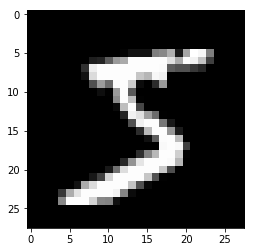

In [0]:
plt.imshow(X_train[0], cmap="gray")

### Normalize images

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

### Generate noise dataset

In [0]:
noise_factor = 0.3

In [0]:
noise_dataset = []

In [0]:
for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [0]:
noise_dataset = np.array(noise_dataset)

In [0]:
noise_dataset.shape

(60000, 28, 28)

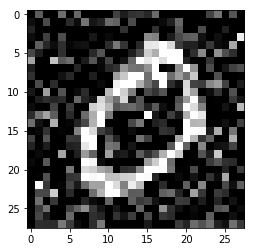

In [0]:
plt.imshow(noise_dataset[1], cmap="gray")

In [0]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

## Stage 3: Defining the AutoEncoder

In [0]:
model = tf.keras.models.Sequential()
#Encoder
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))
#Encoded image
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))
#Decoder
model.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


### Train the AutoEncoder

In [0]:
model.fit(noise_dataset.reshape(-1, 28, 28, 1), 
          X_train.reshape(-1, 28, 28, 1), 
          epochs=50, 
          batch_size=200, 
          validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2571 - val_loss: 0.1134
Epoch 2/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1041 - val_loss: 0.0962
Epoch 3/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0946 - val_loss: 0.0915
Epoch 4/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0916 - val_loss: 0.0897
Epoch 5/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0900 - val_loss: 0.0885
Epoch 6/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0888 - val_loss: 0.0874
Epoch 7/50
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0880 - val_loss: 0.0867
Epoch 8/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0873 - val_loss: 0.0863
Epoch 9/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0869 - val_

### De-noise images with the trained AutoEncoder

In [0]:
predicted = model.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

In [0]:
predicted.shape

(10, 28, 28, 1)

### Visualize results

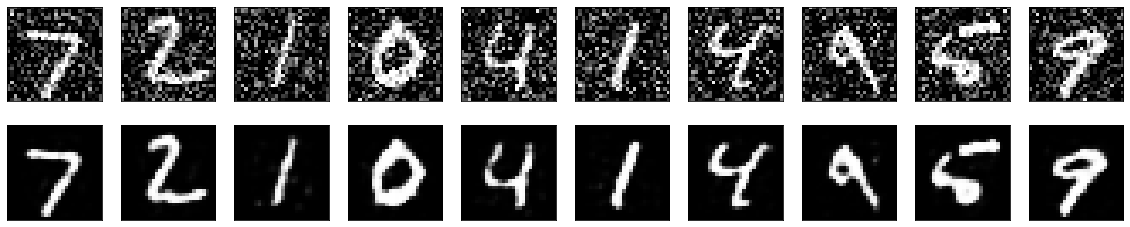

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)